# DS-SF-36 | 10 | Linear Regression, Part 3 | Assignment | Answer Key

In [147]:
#imported a lot of stuff
import os

import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;

In [6]:
df = pd.read_csv(os.path.join('dataset-13-walget-train.csv'))

In [154]:
#Below we created dummy variables using one-hot encoding for a bunch of True/False columns, to see how correlated things are

In [42]:
cigs_df = pd.get_dummies(df.RecentlyPurchasedCigarettes, prefix="cigs")

In [43]:
cloth_df = pd.get_dummies(df.RecentlyPurchasedMaternityClothing, prefix="cloth")

In [81]:
birth_df = pd.get_dummies(df.RecentlyPurchasedBirthControl, prefix="birth")

In [47]:
is_df = pd.get_dummies(df.IsPregnant, prefix="prego")

In [133]:
gen_df = pd.get_dummies(df.AccountHolderImpliedGender, prefix="gender")

In [84]:
wine_df = pd.get_dummies(df.PurchasedWineRegularlyUntilRecentlyThenStopped, prefix="wine")

In [86]:
vita_df = pd.get_dummies(df.RecentlyPurchasedPrenatalVitamins, prefix="vita") 

In [55]:
cess_df = pd.get_dummies(df.RecentlyPurchasedSmokingCessationProducts, prefix="cess")

In [134]:
#we joined each one to df. Here's an example
df = df.join([gen_df])

In [137]:
#We dropped a superfluous column with strings because it fucked us up later
df = df.drop('AccountHolderImpliedGender', 1)
df

,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,...,home_Apartment,home_Home,home_PO Box,gender_Female,gender_Male
0,False,False,NaN,False,True,...,0,1,0,1,0
1,False,False,False,False,False,...,0,0,1,1,0
2,False,True,False,False,False,...,1,0,0,0,1
3,False,False,False,False,True,...,0,1,0,0,1
4,False,False,False,False,False,...,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
595,False,False,False,False,False,...,0,1,0,0,1
596,True,False,False,True,False,...,0,1,0,1,0
597,False,False,False,True,False,...,1,0,0,0,1
598,False,False,False,False,False,...,0,1,0,0,1


In [65]:
#we played with this, not really knowing what we were doing
def score_l(df):
    return model.score()

In [156]:
#we used statsmodel to fit the data and explore correlations
smf.ols(formula = 'prego_True ~ birth_False', data = train_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             prego_True   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     62.41
Date:                Mon, 07 Aug 2017   Prob (F-statistic):           1.34e-14
Time:                        21:05:28   Log-Likelihood:                -405.69
No. Observations:                 600   AIC:                             815.4
Df Residuals:                     598   BIC:                             824.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1190      0.052      2.289      0.022       0.017       0.221
birth_False     0.4430      0.056      7.900      0.000       0.333       0.553
==============================================================================
Omnibus:                        1.987   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.370   Jarque-Bera (JB):               76.196
Skew:                          -0.140   Prob(JB):                     2.85e-17
Kurtosis:                       1.277   Cond. No.                         5.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
#checking correlations/fitting a bunch of variables 
smf.ols(formula = 'prego_True ~ test_True + cloth_True + cess_True', data = test_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             prego_True   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 07 Aug 2017   Prob (F-statistic):           1.34e-06
Time:                        21:05:54   Log-Likelihood:                -114.91
No. Observations:                 180   AIC:                             237.8
Df Residuals:                     176   BIC:                             250.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3821      0.038     10.091      0.000       0.307       0.457
test_True      0.4756      0.146      3.259      0.001       0.188       0.763
cloth_True     0.2769      0.122      2.273      0.024       0.037       0.517
cess_True      0.5063      0.145      3.482      0.001       0.219       0.793
==============================================================================
Omnibus:                        4.923   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.085   Jarque-Bera (JB):               24.719
Skew:                           0.404   Prob(JB):                     4.29e-06
Kurtosis:                       1.374   Cond. No.                         4.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
#again tried this, to no avail
def predict_linear(df):
    return model.predict(model_a(df))

In [159]:
#how correlated are all the columns?
df.corr()

,IsPregnant,test_False,test_True,prego_False,prego_True,cloth_False,cloth_True,cess_False,cess_True,birth_False,birth_True,wine_False,wine_True,vita_False,vita_True,home_Apartment,home_Home,home_PO Box,gender_Female,gender_Male
IsPregnant,1.000000,-0.239881,0.239881,-1.000000,1.000000,-0.283194,0.283194,-0.226708,0.226708,0.325244,-0.325244,-0.274119,0.274119,-0.268297,0.268297,-0.060779,0.060197,0.005572,0.108376,-0.130756
test_False,-0.239881,1.000000,-1.000000,0.239881,-0.239881,0.070189,-0.070189,0.146283,-0.146283,-0.053867,0.053867,0.110923,-0.110923,0.128599,-0.128599,0.046903,-0.062145,0.021727,0.013323,0.015779
test_True,0.239881,-1.000000,1.000000,-0.239881,0.239881,-0.070189,0.070189,-0.146283,0.146283,0.053867,-0.053867,-0.110923,0.110923,-0.128599,0.128599,-0.046903,0.062145,-0.021727,-0.013323,-0.015779
prego_False,-1.000000,0.239881,-0.239881,1.000000,-1.000000,0.283194,-0.283194,0.226708,-0.226708,-0.325244,0.325244,0.274119,-0.274119,0.268297,-0.268297,0.060779,-0.060197,-0.005572,-0.108376,0.130756
prego_True,1.000000,-0.239881,0.239881,-1.000000,1.000000,-0.283194,0.283194,-0.226708,0.226708,0.325244,-0.325244,-0.274119,0.274119,-0.268297,0.268297,-0.060779,0.060197,0.005572,0.108376,-0.130756
cloth_False,-0.283194,0.070189,-0.070189,0.283194,-0.283194,1.000000,-1.000000,0.071638,-0.071638,-0.107023,0.107023,0.045175,-0.045175,0.085823,-0.085823,-0.010034,-0.035857,0.069823,-0.055893,0.012123
cloth_True,0.283194,-0.070189,0.070189,-0.283194,0.283194,-1.000000,1.000000,-0.071638,0.071638,0.107023,-0.107023,-0.045175,0.045175,-0.085823,0.085823,0.010034,0.035857,-0.069823,0.055893,-0.012123
cess_False,-0.226708,0.146283,-0.146283,0.226708,-0.226708,0.071638,-0.071638,1.000000,-1.000000,-0.062361,0.062361,0.112923,-0.112923,0.000226,-0.000226,0.076781,0.011169,-0.126203,-0.049478,0.027438
cess_True,0.226708,-0.146283,0.146283,-0.226708,0.226708,-0.071638,0.071638,-1.000000,1.000000,0.062361,-0.062361,-0.112923,0.112923,-0.000226,0.000226,-0.076781,-0.011169,0.126203,0.049478,-0.027438
birth_False,0.325244,-0.053867,0.053867,-0.325244,0.325244,-0.107023,0.107023,-0.062361,0.062361,1.000000,-1.000000,-0.093459,0.093459,-0.026125,0.026125,-0.067822,0.104798,-0.074007,0.096207,-0.093618


In [161]:
#Our attempt to use logistic regression failed miserably. I Mike had not idea what was going on here.
#Step 1
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4,
                                                    random_state=42)
#Step 2
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Step 3
preds = lr.predict(X_test)

#Step 4
testing_score = accuracy_score(y_test, preds)

print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

The model accurately classified 100.00 percent of the testing data


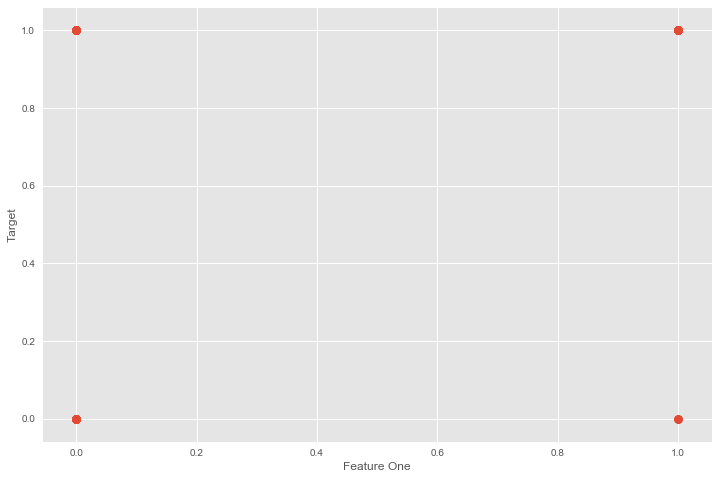

In [162]:
#Attempted to plot things. Another miserable failure by Mike. Help.
plt.figure(figsize=(12,8))
plt.scatter(df.IsPregnant, df.birth_False, s=60)
plt.xlabel("Feature One")
plt.ylabel("Target");

In [163]:
#playing with functions. Failure.
def my_class(row):
    if row.RecentlyPurchasedPregnancyTest == True:
        return row.IsPregnant.groupby(df.AccountHolderImpliedGender)

my_class("1")

AttributeError: 'str' object has no attribute 'RecentlyPurchasedPregnancyTest'

In [15]:
df.columns

Index([u'AccountHolderImpliedGender', u'AccountHolderAddress',
       u'RecentlyPurchasedPregnancyTest', u'RecentlyPurchasedBirthControl',
       u'RecentlyPurchasedFeminineHygieneProducts',
       u'RecentlyPurchasedFolicAcidSupplements',
       u'RecentlyPurchasedPrenatalVitamins',
       u'RecentlyPurchasedPrenatalYogaDVD', u'RecentlyPurchasedBodyPillow',
       u'RecentlyPurchasedGingerAle', u'RecentlyPurchasedSeaBands',
       u'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
       u'RecentlyPurchasedCigarettes',
       u'RecentlyPurchasedSmokingCessationProducts',
       u'PurchasedWineRegularlyUntilRecentlyThenStopped',
       u'RecentlyPurchasedWine', u'RecentlyPurchasedMaternityClothing',
       u'IsPregnant'],
      dtype='object')

In [13]:
len(df.columns)

18

In [26]:
color = pd.Series(df["IsPregnant"]).map({True:"red", False:"blue"})

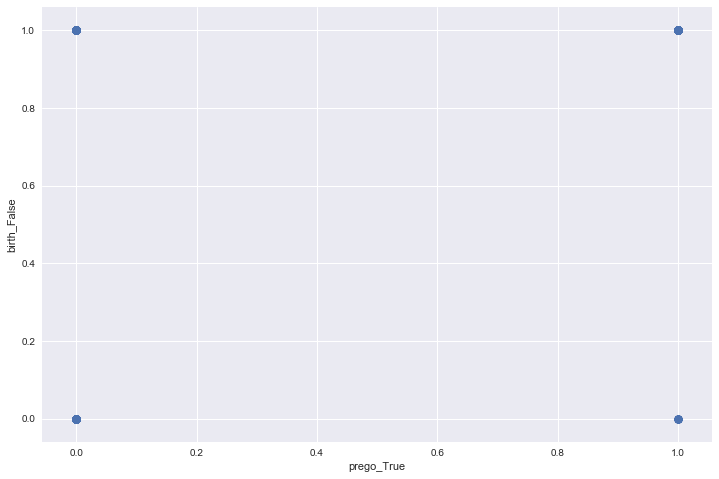

In [99]:
plt.figure(figsize=(12,8))
plt.scatter(df.prego_True, df.birth_False, s=60)
plt.xlabel("prego_True")
plt.ylabel("birth_False");

Answer: Yes, both coefficients are significant.  We find that when fixing income, students on average tend to carry \$382 more balance than non-students.  Also, on average higher income earners tend to carry more balance on their credit cards: For every \$1,000 additional income, people on average carry around a higher balance of \$6.

> ## Question 13.  No let's consider the interaction effect of `Student` and `Income` on `Balance` simultaneously.  Are all the coefficients significant?  It they are, write down your regression model below

(First generate a new variable for the interaction term)

In [15]:
df['Student * Income'] = df['Student_Yes'] * df['Income']

In [16]:
X = df[ ['Student_Yes', 'Income', 'Student * Income'] ]
y = df.Balance

model = linear_model.LinearRegression()
model.fit(X,y)

print model.intercept_
print model.coef_
print feature_selection.f_regression(X, y)[1]

200.62315295
[ 476.67584321    6.21816874   -1.99915087]
[  1.48773411e-07   1.03088580e-22   4.61768368e-08]


Answer: Yes, they are all significant.  $Balance = 200 + 477 * Student_{Yes} + 6.21 * Income - 2 * Income * Student_{Yes}$

> ## Question 14.  Is there any income level at which students and non-students on average carry same level of balance?

Answer:

- Non-students: $Balance = 200 + 6.21 * Income$
- Students: $Balance = 200 + 477 + 6.21 * Income - 2 * Income$

At the \$238 income level, these two groups carry the same amount of balance.  Since this range of income is higher than any observed values for students, it is safe to say that within the range of our observations, students on average carry more balance.

We interpret the results this way: We say, students on average carry \$477 more than non-students.  But for every \$1,000 they make this difference between the balance that students and non-students are carrying is decreased by \$2.